# Data Loading & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score

In [2]:
#setting the display option
pd.set_option("display.max_columns", None)

In [3]:
#leading the datasets

df = pd.read_csv('/home/kevin/Downloads/train_s3TEQDk.csv')

df_sub = pd.read_csv('/home/kevin/Downloads/test_mSzZ8RL.csv')


**Instructions**: 
1. It is mandatory to attach the provided training data and creat `df` dataframe, for training the model.
2. Please note that `df_sub` is the public split test dataset, that has been provided for this competition. In order to test the private split test dataset, simply give the location of the same to `df_sub` dataframe above and the model will give the *Probability of Customer showing interest (class 1)*

In [4]:
#saving the test IDs to output CSV creation

IDs_test = df_sub['ID']

In [5]:
IDs_test

0         VBENBARO
1         CCMEWNKY
2         VK3KGA9M
3         TT8RPZVC
4         SHQZEYTZ
            ...   
105307    DBENJOYI
105308    CWQ72DWS
105309    HDESC8GU
105310    2PW4SFCA
105311    F2NOYPPZ
Name: ID, Length: 105312, dtype: object

In [6]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
print(df.shape)
print(df_sub.shape)

(245725, 11)
(105312, 10)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
#check for duplicates in train data
df.drop_duplicates().shape

(245725, 11)

Train data does not have any duplicate rows but is has missing values in `Credit_Product` column. We would have to take care of the same.

# Univariate Analysis

## Gender

In [10]:
df.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [11]:
pd.crosstab(index=df.Gender, columns=df.Is_Lead, normalize='index')

Is_Lead,0,1
Gender,,
Female,0.796419,0.203581
Male,0.734845,0.265155


From above, we note that there are more leads among male compared with female.

## Age

In [12]:
df.Age.value_counts()

28    14533
29    13284
27    13005
30    11066
26     9039
      ...  
82      749
83      694
84      624
85      604
23        1
Name: Age, Length: 63, dtype: int64

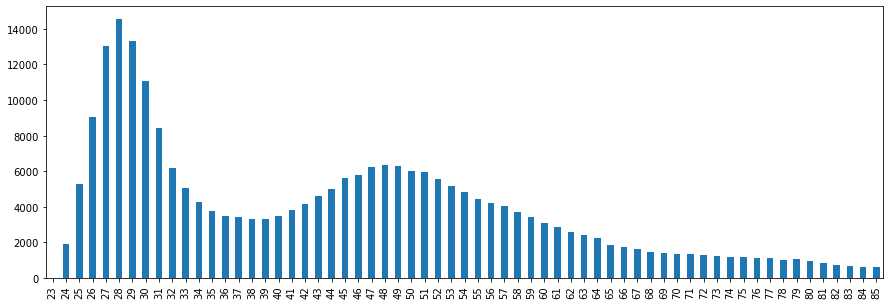

In [13]:
# checking the age distribution of customers
plt.figure(figsize=(15,5))
df.Age.value_counts().sort_index().plot.bar()
plt.show()

/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


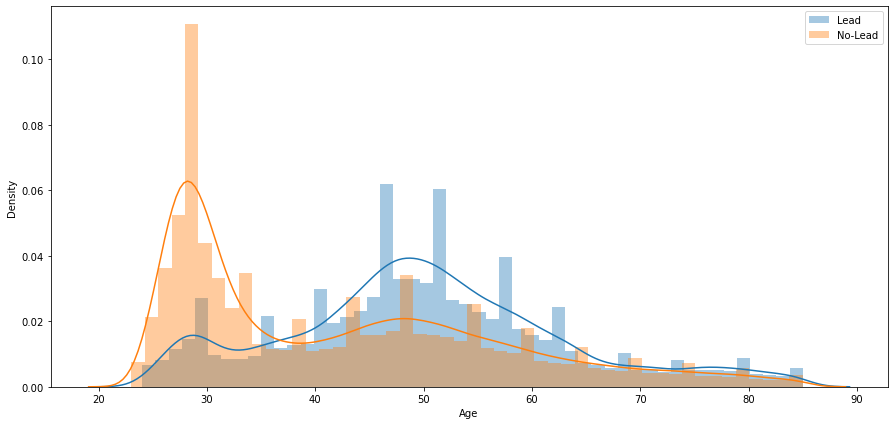

In [14]:
#checking the age distribution among Lead and Non-Lead customers

plt.figure(figsize=(15,7))
sns.distplot(df[df.Is_Lead==1].Age, label='Lead')
sns.distplot(df[df.Is_Lead==0].Age, label='No-Lead')
plt.legend()
plt.show()

From the above, we note that customers below age of 35 years have less lead rate while that of above 35 years have relatively higher lead rate. Let's bin the Age column accordingly.

In [15]:
df.Age.describe()

count    245725.000000
mean         43.856307
std          14.828672
min          23.000000
25%          30.000000
50%          43.000000
75%          54.000000
max          85.000000
Name: Age, dtype: float64

In [16]:
#binning the age column into two categories

df['Age_cat_1'] = pd.cut(df.Age, bins=[0,35,100], labels=['Age_L','Age_H'])
df_sub['Age_cat_1'] = pd.cut(df_sub.Age, bins=[0,35,100], labels=['Age_L','Age_H'])

In [17]:
pd.crosstab(index=df.Age_cat_1, columns=df.Is_Lead, normalize='index')

Is_Lead,0,1
Age_cat_1,,
Age_L,0.915225,0.084775
Age_H,0.665377,0.334623


## Region_Code

In [18]:
df.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

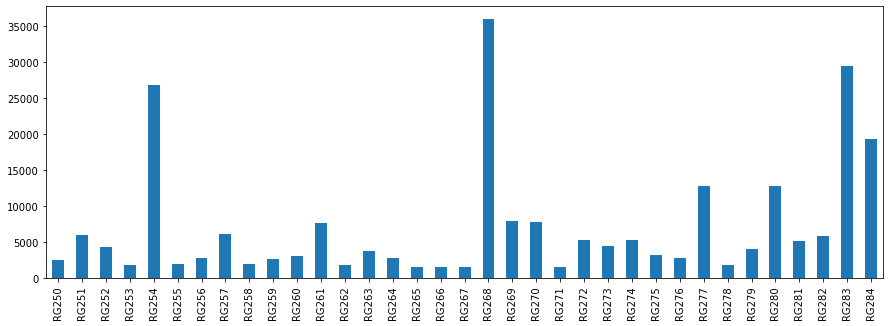

In [19]:
# plotting the value count of customers from different region_codes

plt.figure(figsize=(15,5))
df.Region_Code.value_counts().sort_index().plot.bar()
plt.show()

In [20]:
df.Region_Code.value_counts().describe()

count       35.000000
mean      7020.714286
std       8353.414897
min       1497.000000
25%       2257.000000
50%       3976.000000
75%       6867.000000
max      35934.000000
Name: Region_Code, dtype: float64

In [21]:
#checking the lead rate among customers from different regions

pd.crosstab(index=df.Region_Code, columns=df.Is_Lead, normalize='index')

Is_Lead,0,1
Region_Code,,
RG250,0.842548,0.157452
RG251,0.767899,0.232101
RG252,0.861876,0.138124
RG253,0.741119,0.258881
RG254,0.787146,0.212854
RG255,0.767592,0.232408
RG256,0.859150,0.140850
RG257,0.808228,0.191772
RG258,0.779600,0.220400


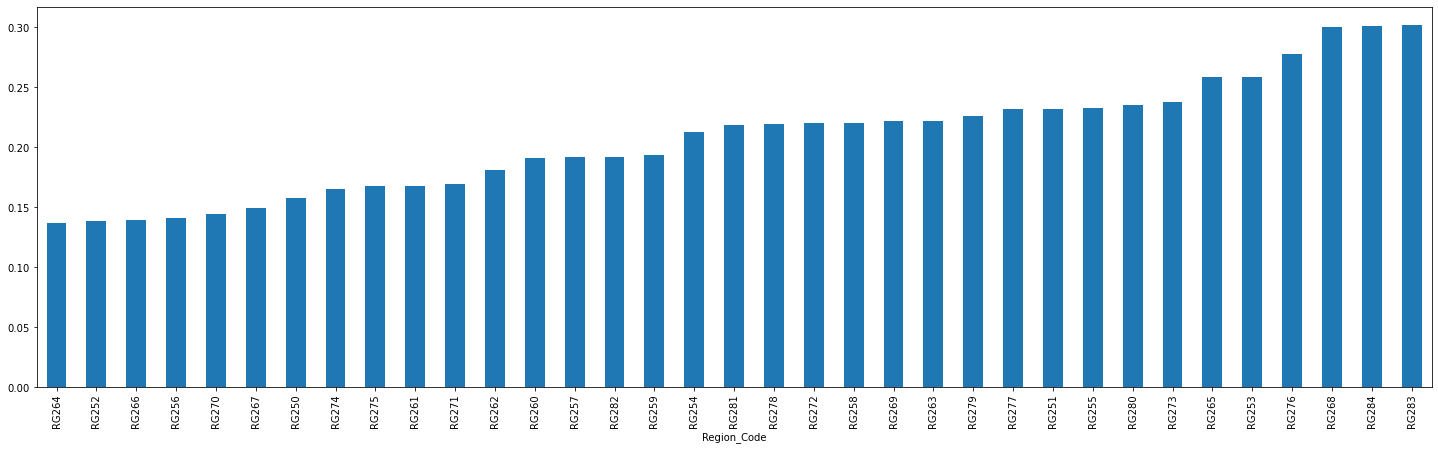

In [22]:
plt.figure(figsize=(25,7))
pd.crosstab(index = df.Region_Code,
            columns = df.Is_Lead,
            normalize='index').iloc[:,1].sort_values().plot.bar()
plt.show()

Let's bin the customers such that customers from regions with less than 20% lead rate get into one bin and more than 20% get into other bin.

In [23]:
rc_tab = pd.crosstab(index = df.Region_Code,
            columns = df.Is_Lead,
            normalize='index')

rc1 = []
rc2 = []

for i in range(rc_tab.shape[0]):
    if rc_tab[1][i]<=rc_tab.loc['RG259', 1]:
        rc1.append(rc_tab.index[i])
    else:
        rc2.append(rc_tab.index[i])



df['Region_Code_1'] = df['Region_Code'].apply(lambda x: 'rc1' if x in rc1 else 'rc2')
df_sub['Region_Code_1'] = df_sub['Region_Code'].apply(lambda x: 'rc1' if x in rc1 else 'rc2')


pd.crosstab(index = df.Region_Code_1,
            columns = df.Is_Lead,
            normalize='index')

Is_Lead,0,1
Region_Code_1,,
rc1,0.834397,0.165603
rc2,0.739487,0.260513


From abvoe, we notice the difference in lead rate among customers from `rc1` and from `rc2`. Hence the above binning seems viable.

## Occupation

In [24]:
df.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [25]:
#checking lead rate among customers with different occupation

pd.crosstab(index=df.Occupation, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Occupation,,
Entrepreneur,0.339333,0.660667
Other,0.755048,0.244952
Salaried,0.840331,0.159669
Self_Employed,0.724035,0.275965


We note that `Entrepreneurs` have more lead compared to non-lead, while others have less lead compared to non-lead. Let's create a new column accordingly.

In [26]:
df['is_Entrepreneur'] = df.Occupation.apply(lambda x:1 if x=='Entrepreneur' else 0)
df_sub['is_Entrepreneur'] = df_sub.Occupation.apply(lambda x:1 if x=='Entrepreneur' else 0)

In [27]:
pd.crosstab(index=df.is_Entrepreneur, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
is_Entrepreneur,,
0,0.767438,0.232562
1,0.339333,0.660667


## Channel_Code

In [28]:
df.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [29]:
# checking the lead rate among customers acquired via different channel_code

pd.crosstab(index=df.Channel_Code, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Channel_Code,,
X1,0.908579,0.091421
X2,0.672105,0.327895
X3,0.632975,0.367025
X4,0.752200,0.247800


X1 channel code seems difference maker in terms of Channel_Code. So we create feature, based on it.

In [30]:
df['Channel_Code_cat'] = df.Channel_Code.apply(lambda x:0 if x=='X1' else 1)

df_sub['Channel_Code_cat'] = df_sub.Channel_Code.apply(lambda x:0 if x=='X1' else 1)

In [31]:
pd.crosstab(index=df.Channel_Code_cat, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Channel_Code_cat,,
0,0.908579,0.091421
1,0.656313,0.343687


## Vintage

In [32]:
df.Vintage.value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

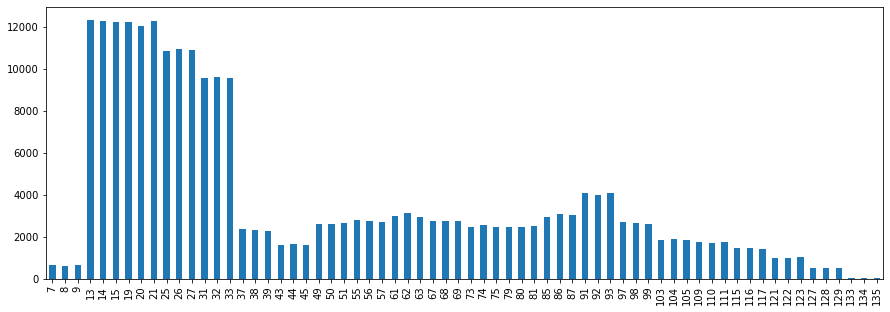

In [33]:
plt.figure(figsize=(15,5))
df.Vintage.value_counts().sort_index().plot.bar()
plt.show()

From above, it seems that bank measures `Vintage` of customers initially after 6 months and then during every alernate quarters.

In [34]:
df.groupby(['Vintage']).Is_Lead.sum()/df.groupby(['Vintage']).ID.count()*100

Vintage
7      22.685185
8      21.809370
9      23.197492
13     14.905171
14     14.706122
         ...    
128    37.524950
129    32.665331
133    16.666667
134    42.857143
135    21.052632
Length: 66, dtype: float64

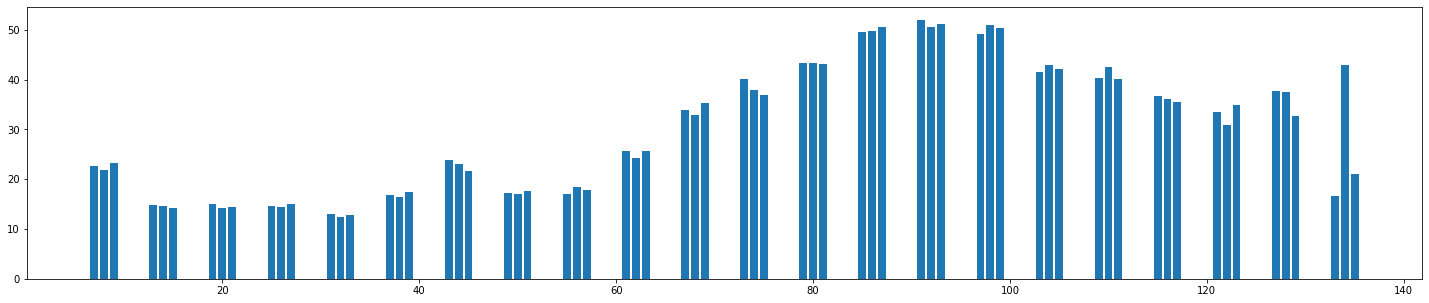

In [35]:
#plotting the lead rate among customers with different Vintage

plt.figure(figsize=(25,5))
plt.bar(x = df.groupby(['Vintage']).Is_Lead.sum().index, height = df.groupby(['Vintage']).Is_Lead.sum()/df.groupby(['Vintage']).ID.count()*100)
plt.show()

From the above,it is noticed that till certain months, the lead rate increases and then decreases. We bin the customers accordingly.

In [36]:
df['Vintage_cat_2'] = df.Vintage.apply(lambda x:1 if (x>60) else 0)
df_sub['Vintage_cat_2'] = df_sub.Vintage.apply(lambda x:1 if (x>60) else 0)

In [37]:
pd.crosstab(index=df.Vintage_cat_2, columns=df.Is_Lead, normalize='index')

Is_Lead,0,1
Vintage_cat_2,,
0,0.849669,0.150331
1,0.586488,0.413512


## Credit_Product

In [38]:
df.Credit_Product.value_counts(dropna=False)

No     144357
Yes     72043
NaN     29325
Name: Credit_Product, dtype: int64

We notice that we have NAN values in this column. Let's give a new categoty viz. `not_available` to all the NANs.

In [39]:
df.Credit_Product = df.Credit_Product.map({'No':'No','Yes':'Yes',np.nan:'not_available'})
df_sub.Credit_Product = df_sub.Credit_Product.map({'No':'No','Yes':'Yes',np.nan:'not_available'})

In [40]:
df.Credit_Product.value_counts()

No               144357
Yes               72043
not_available     29325
Name: Credit_Product, dtype: int64

In [41]:
# checking the lead rate among customers with different credict product usage data

pd.crosstab(index=df.Credit_Product, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Credit_Product,,
No,0.926412,0.073588
Yes,0.685049,0.314951
not_available,0.148338,0.851662


From above we note tha `not_available` class has highest lead rate, followed by `credit_product` users and non-users. Hence this category seems differnce maker and we keep it.

## Avg_Account_Balance

In [42]:
df.Avg_Account_Balance.value_counts()

4022185    127
1611273     35
4126262     33
1142030     32
936814      31
          ... 
2761945      1
3173446      1
2315477      1
3120366      1
765898       1
Name: Avg_Account_Balance, Length: 135292, dtype: int64

/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


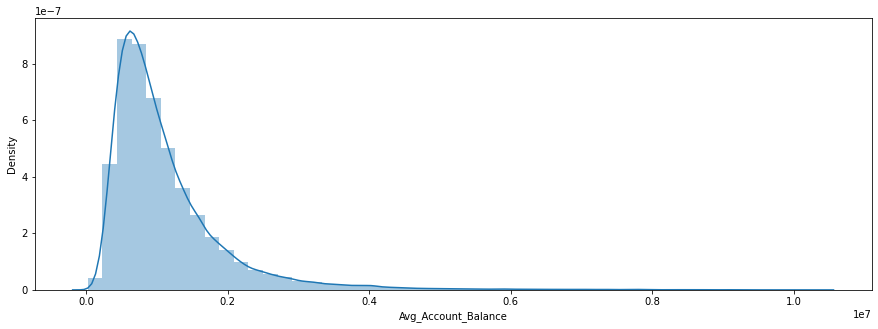

In [43]:
#checking the distribution of different Avg_Account_Balance

plt.figure(figsize=(15,5))
sns.distplot(df.Avg_Account_Balance)
plt.show()

/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


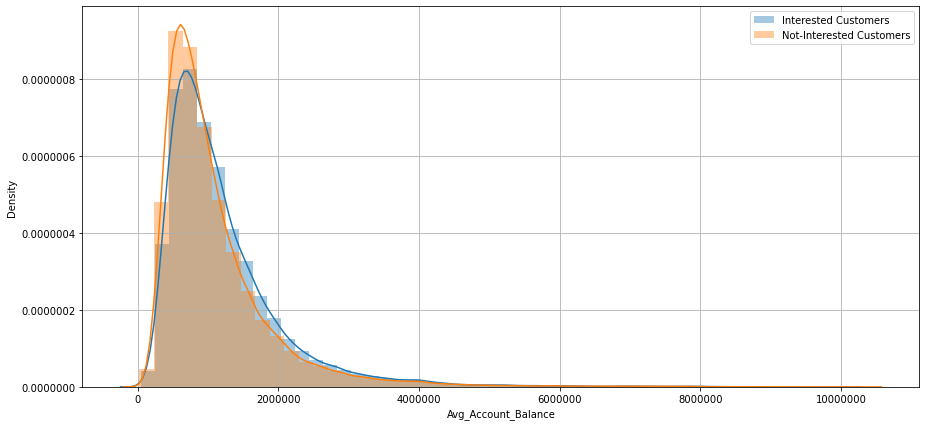

In [44]:
#checking the distribution of Avg_Account_Balance for Lead and Non-Lead customers

plt.figure(figsize=(15,7))
sns.distplot(df[df.Is_Lead==1].Avg_Account_Balance, label='Interested Customers')
sns.distplot(df[df.Is_Lead==0].Avg_Account_Balance, label='Not-Interested Customers')
plt.legend()

plt.grid()
plt.ticklabel_format(style = 'plain')
plt.show()


/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kevin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


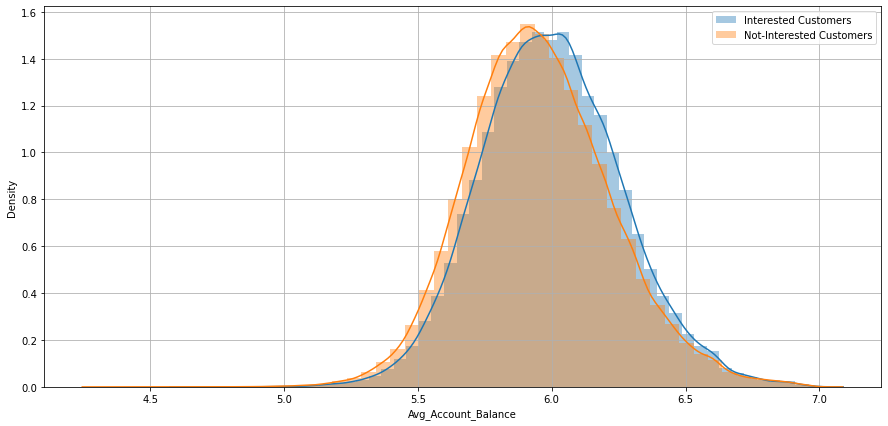

In [45]:
# changing the scale for better visualisation of the above graph

plt.figure(figsize=(15,7))
sns.distplot(np.log10(df[df.Is_Lead==1].Avg_Account_Balance), label='Interested Customers')
sns.distplot(np.log10(df[df.Is_Lead==0].Avg_Account_Balance), label='Not-Interested Customers')
plt.legend()

plt.grid()
plt.ticklabel_format(style = 'plain')
plt.show()


From the above, we note that customers with average account balance of more than *1000000* have more tendency for lead. We bin the customers accordingly.

In [46]:
df['Avg_Account_Balance_cat'] = df.Avg_Account_Balance.apply(lambda x:0 if x<1000000 else 1)
df_sub['Avg_Account_Balance_cat'] = df_sub.Avg_Account_Balance.apply(lambda x:0 if x<1000000 else 1)

In [47]:
#checking the lead rate after binning based on Avg_Account_Balance_cat

pd.crosstab(index=df.Avg_Account_Balance_cat, columns=df.Is_Lead, normalize='index')

Is_Lead,0,1
Avg_Account_Balance_cat,,
0,0.787606,0.212394
1,0.729595,0.270405


Let's further check for any more insight from `Avg_Account_Balance` column.

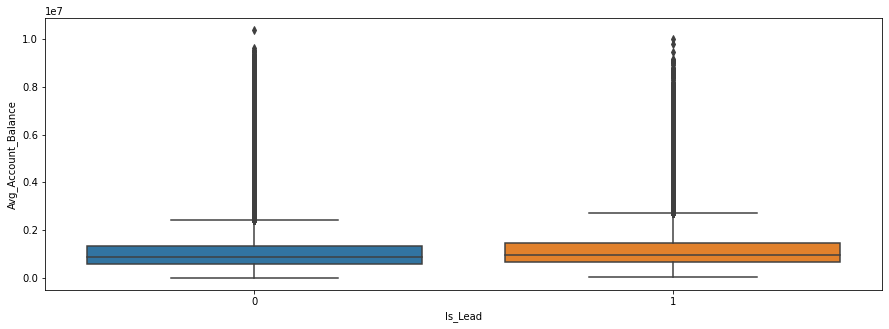

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Is_Lead, y=df.Avg_Account_Balance)
plt.show()

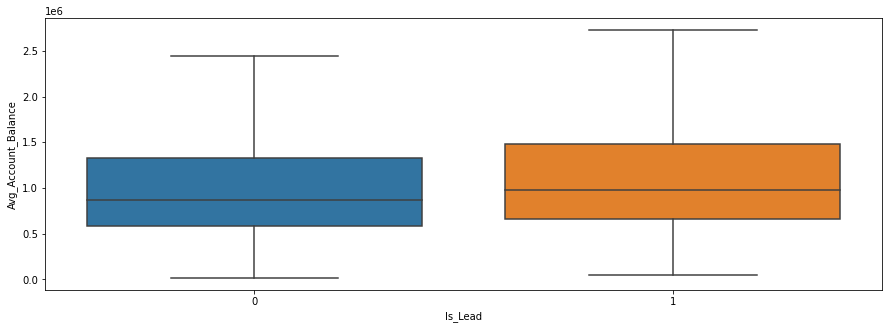

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.Is_Lead, y=df.Avg_Account_Balance, showfliers=False)
plt.show()

In [50]:
desc_data = df.Avg_Account_Balance.describe()
desc_data

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

In [51]:
#binning the customers based on different quartiles of Avg_Account_Balance column

df['Avg_Account_Balance_temp'] = pd.cut(df.Avg_Account_Balance,
                                        [0,desc_data['25%'],desc_data['50%'], desc_data['75%'], 1000000000000],
                                      labels= ['L','ML','MH','H'])

In [52]:
pd.crosstab(index=df.Avg_Account_Balance_temp, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Avg_Account_Balance_temp,,
L,0.808442,0.191558
ML,0.774383,0.225617
MH,0.746345,0.253655
H,0.721993,0.278007


`Avg_Account_Balance_temp`seems more promising so we drop the `Avg_Account_Balance_cat` categorical column.

In [53]:
df.drop(['Avg_Account_Balance_cat'], axis=1, inplace=True)
df_sub.drop(['Avg_Account_Balance_cat'], axis=1, inplace=True)

In [54]:
df_sub['Avg_Account_Balance_temp'] = pd.cut(df_sub.Avg_Account_Balance,
                                        [0,desc_data['25%'],desc_data['50%'], desc_data['75%'], 1000000000000],
                                      labels= ['L','ML','MH','H'])

## Is_Active

In [55]:
df.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [56]:
pd.crosstab(index=df.Is_Active, columns=df.Is_Lead, normalize='index')  

Is_Lead,0,1
Is_Active,,
No,0.791849,0.208151
Yes,0.717033,0.282967


Active customers have higher lead rate.

In [57]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_cat_1,Region_Code_1,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,Avg_Account_Balance_temp
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Age_H,rc2,0,1,0,MH
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Age_L,rc2,0,0,0,L
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Age_H,rc2,0,1,0,H
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Age_L,rc1,0,0,0,L
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Age_L,rc1,0,0,0,ML


# Bivariate Analysis

## Gender vs occupation vs Is_lead

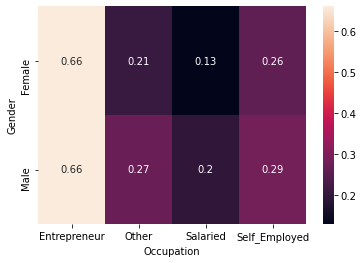

In [58]:
sns.heatmap(pd.crosstab(index = df.Gender, columns = df.Occupation, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

From above, we do not see any difference maker slice.

## Gender vs channel vs Is_lead

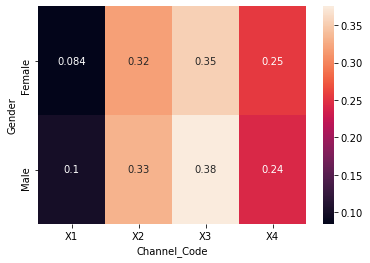

In [59]:
sns.heatmap(pd.crosstab(index = df.Gender, columns = df.Channel_Code, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

From above, we note that female customers acquired from channel_code X1 have least lead rate compared to any other slice, so we create feature.

In [60]:
df.Gender + '_' + df.Channel_Code

0         Female_X3
1         Female_X1
2         Female_X3
3           Male_X1
4         Female_X1
            ...    
245720      Male_X3
245721      Male_X1
245722    Female_X1
245723    Female_X1
245724      Male_X1
Length: 245725, dtype: object

In [61]:
df['X1_female'] = (df.Gender + '_' + df.Channel_Code).apply(lambda x:1 if x=='Female_X1' else 0)
df_sub['X1_female'] = (df_sub.Gender + '_' + df_sub.Channel_Code).apply(lambda x:1 if x=='Female_X1' else 0)

In [62]:
pd.crosstab(index = df.X1_female, columns = df.Is_Lead, normalize='index')

Is_Lead,0,1
X1_female,,
0,0.715317,0.284683
1,0.915709,0.084291


## Gender vs Vintage_cat_2 vs is_lead

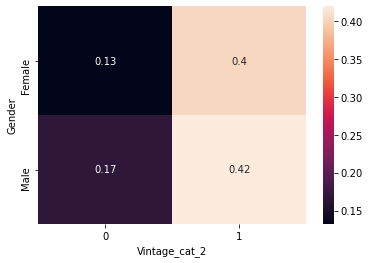

In [63]:
sns.heatmap(pd.crosstab(index = df.Gender, columns = df.Vintage_cat_2, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

## Gender vs Age_cat_1 vs is_lead

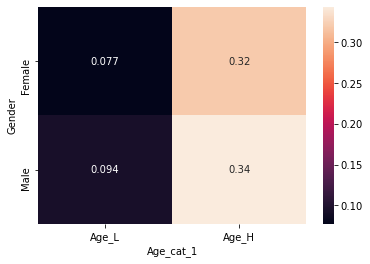

In [64]:
sns.heatmap(pd.crosstab(index = df.Gender, columns = df.Age_cat_1, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

## Gender vs is_active vs Is_lead

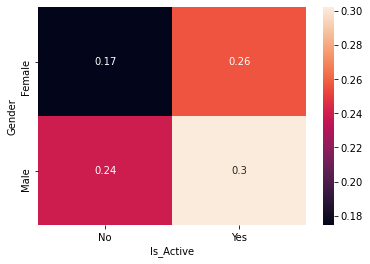

In [65]:
sns.heatmap(pd.crosstab(index = df.Gender, columns = df.Is_Active, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

We note here that inactive female customers have least lead rate compared with any other slice, so we create feature.

In [66]:
df.Gender + '_' + df.Is_Active

0          Female_No
1          Female_No
2         Female_Yes
3            Male_No
4          Female_No
             ...    
245720       Male_No
245721      Male_Yes
245722     Female_No
245723     Female_No
245724       Male_No
Length: 245725, dtype: object

In [67]:
df['inactive_female'] = (df.Gender + '_' + df.Is_Active).apply(lambda x:1 if x=='Female_No' else 0)
df_sub['inactive_female'] = (df_sub.Gender + '_' + df_sub.Is_Active).apply(lambda x:1 if x=='Female_No' else 0)

In [68]:
pd.crosstab(index=df.inactive_female, columns=df.Is_Lead, normalize="index")

Is_Lead,0,1
inactive_female,,
0,0.736873,0.263127
1,0.825280,0.174720


## Region_Code_1 vs Occupation vs Is_lead

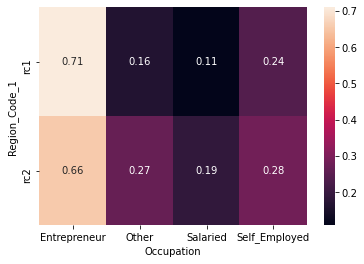

In [69]:
sns.heatmap(pd.crosstab(index = df.Region_Code_1, columns = df.Occupation, values=df.Is_Lead, aggfunc=np.mean),
            annot=True)
plt.show()

## Avg_Account_Balance vs Age vs Is_Lead

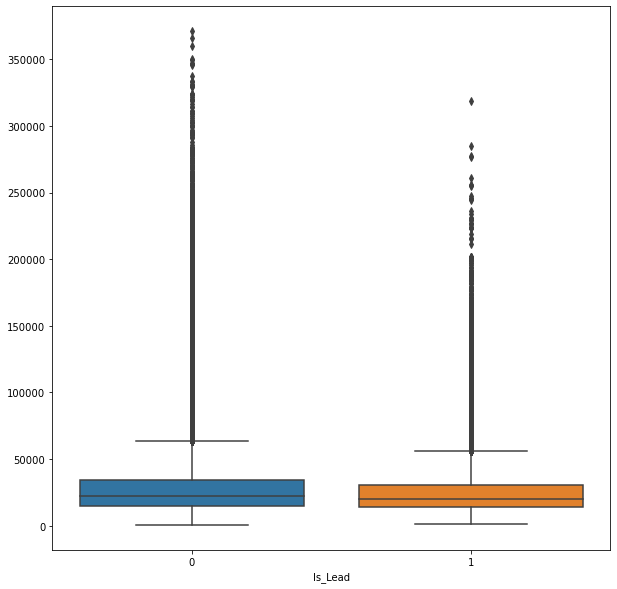

In [70]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df.Is_Lead, y=df.Avg_Account_Balance/df.Age)
plt.show()

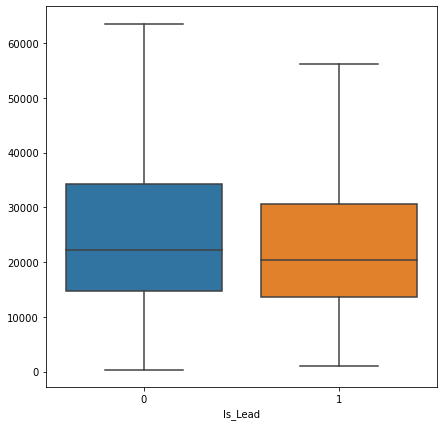

In [71]:
plt.figure(figsize=(7,7))
sns.boxplot(x=df.Is_Lead, y=df.Avg_Account_Balance/df.Age, showfliers=False)
plt.show()

We note that median balance by age is low for customers with leads. So we create feature accordingly.

In [72]:
df['Bal_by_Age'] = df.Avg_Account_Balance/df.Age
df_sub['Bal_by_Age'] = df_sub.Avg_Account_Balance/df_sub.Age

In [73]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_cat_1,Region_Code_1,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,Avg_Account_Balance_temp,X1_female,inactive_female,Bal_by_Age
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Age_H,rc2,0,1,0,MH,0,1,14324.602740
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Age_L,rc2,0,0,0,L,1,1,19399.600000
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Age_H,rc2,0,1,0,H,0,0,26505.625000
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Age_L,rc1,0,0,0,L,0,0,13836.882353
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Age_L,rc1,0,0,0,ML,1,1,29559.566667


# Frequency-encoding of categorical features

In [74]:
set(df.select_dtypes(['object', 'category']).columns) 

{'Age_cat_1',
 'Avg_Account_Balance_temp',
 'Channel_Code',
 'Credit_Product',
 'Gender',
 'ID',
 'Is_Active',
 'Occupation',
 'Region_Code',
 'Region_Code_1'}

In [75]:
#getting list of all the categorical feartures for freq-encoding

categorical_feartures = set(df.select_dtypes(['object', 'category']).columns) 

categorical_feartures.remove('ID') 

to_be_added = set(['is_Entrepreneur', 'Channel_Code_cat', 'Vintage_cat_2',
                           'X1_female', 'inactive_female'])

categorical_feartures = list(categorical_feartures.union(to_be_added))
categorical_feartures

['Vintage_cat_2',
 'Region_Code',
 'is_Entrepreneur',
 'Region_Code_1',
 'Channel_Code',
 'Gender',
 'Channel_Code_cat',
 'X1_female',
 'Occupation',
 'Age_cat_1',
 'inactive_female',
 'Is_Active',
 'Avg_Account_Balance_temp',
 'Credit_Product']

In [76]:
# applying frequency encoding on categorical features

for cat_feature in categorical_feartures:
    feature_pool = (df.groupby(cat_feature).size()) / len(df)
    df[cat_feature + '_' + 'Freq'] = df[cat_feature].apply(lambda x : float(feature_pool[x])).astype('float64')
    df_sub[cat_feature + '_' + 'Freq'] = df_sub[cat_feature].apply(lambda x : float(feature_pool[x])).astype('float64')

In [77]:
print(df.shape)
print(df_sub.shape)

(245725, 34)
(105312, 33)


# Dummy variable creation

In [78]:
# shortlisting features for dummy variable creation

x=set(df.select_dtypes(['object','category']).columns)
x.remove('ID')
x = list(x)
x

['Region_Code',
 'Channel_Code',
 'Avg_Account_Balance_temp',
 'Gender',
 'Occupation',
 'Age_cat_1',
 'Is_Active',
 'Region_Code_1',
 'Credit_Product']

In [79]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_cat_1,Region_Code_1,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,Avg_Account_Balance_temp,X1_female,inactive_female,Bal_by_Age,Vintage_cat_2_Freq,Region_Code_Freq,is_Entrepreneur_Freq,Region_Code_1_Freq,Channel_Code_Freq,Gender_Freq,Channel_Code_cat_Freq,X1_female_Freq,Occupation_Freq,Age_cat_1_Freq,inactive_female_Freq,Is_Active_Freq,Avg_Account_Balance_temp_Freq,Credit_Product_Freq
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Age_H,rc2,0,1,0,MH,0,1,14324.602740,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.285575,0.610105,0.293177,0.611619,0.249979,0.587474
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Age_L,rc2,0,0,0,L,1,1,19399.600000,0.669895,0.052197,0.989146,0.754453,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250007,0.587474
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Age_H,rc2,0,1,0,H,0,0,26505.625000,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.410565,0.610105,0.706823,0.388381,0.249995,0.587474
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Age_L,rc1,0,0,0,L,0,0,13836.882353,0.669895,0.031417,0.989146,0.245547,0.42209,0.546127,0.42209,0.763089,0.293006,0.389895,0.706823,0.611619,0.250007,0.587474
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Age_L,rc1,0,0,0,ML,1,1,29559.566667,0.669895,0.023722,0.989146,0.245547,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250019,0.587474


In [80]:
#applying get_dummies function on categorical features 

cat_features_dummy = x


for feature in cat_features_dummy:
    df = pd.concat([df, pd.get_dummies(df[feature], drop_first=False, prefix=feature)], axis=1)
    df.drop([feature], axis=1, inplace=True)

for feature in cat_features_dummy:
    df_sub = pd.concat([df_sub, pd.get_dummies(df_sub[feature], drop_first=False, prefix=feature)], axis=1)
    df_sub.drop([feature], axis=1, inplace=True)

In [81]:
df.head()

,ID,Age,Vintage,Avg_Account_Balance,Is_Lead,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,X1_female,inactive_female,Bal_by_Age,Vintage_cat_2_Freq,Region_Code_Freq,is_Entrepreneur_Freq,Region_Code_1_Freq,Channel_Code_Freq,Gender_Freq,Channel_Code_cat_Freq,X1_female_Freq,Occupation_Freq,Age_cat_1_Freq,inactive_female_Freq,Is_Active_Freq,Avg_Account_Balance_temp_Freq,Credit_Product_Freq,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Avg_Account_Balance_temp_L,Avg_Account_Balance_temp_ML,Avg_Account_Balance_temp_MH,Avg_Account_Balance_temp_H,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Age_cat_1_Age_L,Age_cat_1_Age_H,Is_Active_No,Is_Active_Yes,Region_Code_1_rc1,Region_Code_1_rc2,Credit_Product_No,Credit_Product_Yes,Credit_Product_not_available
0,NNVBBKZB,73,43,1045696,0,0,1,0,0,1,14324.602740,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.285575,0.610105,0.293177,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0
1,IDD62UNG,30,32,581988,0,0,0,0,1,1,19399.600000,0.669895,0.052197,0.989146,0.754453,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0
2,HD3DSEMC,56,26,1484315,0,0,1,0,0,0,26505.625000,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.410565,0.610105,0.706823,0.388381,0.249995,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0
3,BF3NC7KV,34,19,470454,0,0,0,0,0,0,13836.882353,0.669895,0.031417,0.989146,0.245547,0.42209,0.546127,0.42209,0.763089,0.293006,0.389895,0.706823,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0
4,TEASRWXV,30,33,886787,0,0,0,0,1,1,29559.566667,0.669895,0.023722,0.989146,0.245547,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250019,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [82]:
# sanity check

print(df.shape)
print(df_sub.shape)

set(df.columns) - set(df_sub.columns)

(245725, 83)
(105312, 82)


{'Is_Lead'}

# Train-Test splitting

In [83]:
X=df.drop(['ID','Is_Lead'], axis=1)
y=df.Is_Lead

X_sub=df_sub.drop(['ID'], axis=1)

In [84]:
X.head()

,Age,Vintage,Avg_Account_Balance,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,X1_female,inactive_female,Bal_by_Age,Vintage_cat_2_Freq,Region_Code_Freq,is_Entrepreneur_Freq,Region_Code_1_Freq,Channel_Code_Freq,Gender_Freq,Channel_Code_cat_Freq,X1_female_Freq,Occupation_Freq,Age_cat_1_Freq,inactive_female_Freq,Is_Active_Freq,Avg_Account_Balance_temp_Freq,Credit_Product_Freq,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Avg_Account_Balance_temp_L,Avg_Account_Balance_temp_ML,Avg_Account_Balance_temp_MH,Avg_Account_Balance_temp_H,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Age_cat_1_Age_L,Age_cat_1_Age_H,Is_Active_No,Is_Active_Yes,Region_Code_1_rc1,Region_Code_1_rc2,Credit_Product_No,Credit_Product_Yes,Credit_Product_not_available
0,73,43,1045696,0,1,0,0,1,14324.602740,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.285575,0.610105,0.293177,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0
1,30,32,581988,0,0,0,1,1,19399.600000,0.669895,0.052197,0.989146,0.754453,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0
2,56,26,1484315,0,1,0,0,0,26505.625000,0.669895,0.146237,0.989146,0.754453,0.27963,0.453873,0.57791,0.763089,0.410565,0.610105,0.706823,0.388381,0.249995,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0
3,34,19,470454,0,0,0,0,0,13836.882353,0.669895,0.031417,0.989146,0.245547,0.42209,0.546127,0.42209,0.763089,0.293006,0.389895,0.706823,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0
4,30,33,886787,0,0,0,1,1,29559.566667,0.669895,0.023722,0.989146,0.245547,0.42209,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250019,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0


In [85]:
print(X.shape)
print(y.shape)

(245725, 81)
(245725,)


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [88]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208866, 81)
(36859, 81)
(208866,)
(36859,)


In [89]:
#check for stratification of target in trani and test splits

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.76279
1    0.23721
Name: Is_Lead, dtype: float64
0    0.762799
1    0.237201
Name: Is_Lead, dtype: float64


In [90]:
X_train.head()

,Age,Vintage,Avg_Account_Balance,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,X1_female,inactive_female,Bal_by_Age,Vintage_cat_2_Freq,Region_Code_Freq,is_Entrepreneur_Freq,Region_Code_1_Freq,Channel_Code_Freq,Gender_Freq,Channel_Code_cat_Freq,X1_female_Freq,Occupation_Freq,Age_cat_1_Freq,inactive_female_Freq,Is_Active_Freq,Avg_Account_Balance_temp_Freq,Credit_Product_Freq,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Avg_Account_Balance_temp_L,Avg_Account_Balance_temp_ML,Avg_Account_Balance_temp_MH,Avg_Account_Balance_temp_H,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Age_cat_1_Age_L,Age_cat_1_Age_H,Is_Active_No,Is_Active_Yes,Region_Code_1_rc1,Region_Code_1_rc2,Credit_Product_No,Credit_Product_Yes,Credit_Product_not_available
146182,28,19,306391,0,0,0,1,1,10942.535714,0.669895,0.015005,0.989146,0.754453,0.422090,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0
122053,56,86,5148979,0,0,1,0,0,91946.053571,0.330105,0.078624,0.989146,0.754453,0.422090,0.546127,0.42209,0.763089,0.285575,0.610105,0.706823,0.388381,0.249995,0.293185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
107129,45,81,206382,0,1,1,0,0,4586.266667,0.330105,0.007561,0.989146,0.754453,0.279630,0.453873,0.57791,0.763089,0.410565,0.610105,0.706823,0.388381,0.250007,0.293185,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0
8703,48,87,1018622,0,1,1,0,0,21221.291667,0.330105,0.010524,0.989146,0.245547,0.275617,0.546127,0.57791,0.763089,0.410565,0.610105,0.706823,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
145135,27,19,1232311,0,0,0,1,1,45641.148148,0.669895,0.031417,0.989146,0.245547,0.422090,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0


Let's now normalize the continuous features. Here we will use Min and Max values of only the Training split of the dataset, as per standard practice.

# Normalization of  continuous features

In [91]:
#normalize the continuous features

cont_features = ['Age','Vintage','Avg_Account_Balance','Bal_by_Age']

X_train_cont = (X_train[cont_features] - X_train[cont_features].min()) / (X_train[cont_features].max() - X_train[cont_features].min())
X_test_cont = (X_test[cont_features] - X_train[cont_features].min()) / (X_train[cont_features].max() - X_train[cont_features].min())
X_sub_cont = (X_sub[cont_features] - X_train[cont_features].min()) / (X_train[cont_features].max() - X_train[cont_features].min())

X_train.drop(cont_features, axis=1, inplace=True)
X_test.drop(cont_features, axis=1, inplace=True)
X_sub.drop(cont_features, axis=1, inplace=True)

X_train = pd.concat([X_train, X_train_cont], axis=1)
X_test = pd.concat([X_test, X_test_cont], axis=1)
X_sub = pd.concat([X_sub, X_sub_cont], axis=1)


/home/kevin/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
#sanity check

print(X_train.shape)
print(X_test.shape)
print(X_sub.shape)

(208866, 81)
(36859, 81)
(105312, 81)


# Model Building

## Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=100)
LR.fit(X_train, y_train)
roc_auc_score(y_test, LR.predict_proba(X_test)[:,1])

/home/kevin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8609563992067177

In [94]:
LR_out = LR.predict_proba(X_sub)[:,1]

## Neural Network

In [95]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [96]:
model = Sequential([
layers.Dense(X_train.shape[1]),
layers.Dense(54, activation='relu'),
layers.Dense(108, activation='relu'),
layers.Dense(54, activation='relu'),
layers.Dense(10, activation='relu'),
layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])


epochs = 100
model.fit(
  x=X_train.to_numpy(),
    y=y_train.to_numpy(),
  epochs=epochs, 
    validation_split=0.2,
  batch_size=25000
)

Epoch 1/100
7/7 [==============================] - 2s 106ms/step - loss: 0.5949 - auc: 0.5428 - val_loss: 0.5153 - val_auc: 0.7160
Epoch 2/100
7/7 [==============================] - 0s 64ms/step - loss: 0.5028 - auc: 0.7704 - val_loss: 0.4616 - val_auc: 0.8109
Epoch 3/100
7/7 [==============================] - 0s 64ms/step - loss: 0.4470 - auc: 0.8111 - val_loss: 0.4238 - val_auc: 0.8271
Epoch 4/100
7/7 [==============================] - 0s 63ms/step - loss: 0.4150 - auc: 0.8355 - val_loss: 0.3983 - val_auc: 0.8449
Epoch 5/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3910 - auc: 0.8519 - val_loss: 0.3835 - val_auc: 0.8518
Epoch 6/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3771 - auc: 0.8570 - val_loss: 0.3714 - val_auc: 0.8543
Epoch 7/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3661 - auc: 0.8606 - val_loss: 0.3650 - val_auc: 0.8568
Epoch 8/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3624 - auc: 0.8

7/7 [==============================] - 0s 63ms/step - loss: 0.3460 - auc: 0.8742 - val_loss: 0.3526 - val_auc: 0.8641
Epoch 64/100
7/7 [==============================] - 0s 63ms/step - loss: 0.3459 - auc: 0.8744 - val_loss: 0.3523 - val_auc: 0.8642
Epoch 65/100
7/7 [==============================] - 0s 63ms/step - loss: 0.3457 - auc: 0.8745 - val_loss: 0.3525 - val_auc: 0.8641
Epoch 66/100
7/7 [==============================] - 0s 63ms/step - loss: 0.3456 - auc: 0.8746 - val_loss: 0.3525 - val_auc: 0.8638
Epoch 67/100
7/7 [==============================] - 0s 63ms/step - loss: 0.3455 - auc: 0.8747 - val_loss: 0.3525 - val_auc: 0.8643
Epoch 68/100
7/7 [==============================] - 0s 64ms/step - loss: 0.3455 - auc: 0.8747 - val_loss: 0.3528 - val_auc: 0.8643
Epoch 69/100
7/7 [==============================] - 0s 65ms/step - loss: 0.3457 - auc: 0.8745 - val_loss: 0.3523 - val_auc: 0.8641
Epoch 70/100
7/7 [==============================] - 0s 62ms/step - loss: 0.3454 - auc: 0.8746 - 

In [97]:
roc_auc_score(y_test, model.predict(X_test.to_numpy()).reshape(-1))

0.8675934325087451

In [98]:
NN_out = model.predict(X_sub.to_numpy()).reshape(-1)

## Catboost

In [99]:
from catboost import CatBoostClassifier

In [100]:
X_train.head()

,is_Entrepreneur,Channel_Code_cat,Vintage_cat_2,X1_female,inactive_female,Vintage_cat_2_Freq,Region_Code_Freq,is_Entrepreneur_Freq,Region_Code_1_Freq,Channel_Code_Freq,Gender_Freq,Channel_Code_cat_Freq,X1_female_Freq,Occupation_Freq,Age_cat_1_Freq,inactive_female_Freq,Is_Active_Freq,Avg_Account_Balance_temp_Freq,Credit_Product_Freq,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Avg_Account_Balance_temp_L,Avg_Account_Balance_temp_ML,Avg_Account_Balance_temp_MH,Avg_Account_Balance_temp_H,Gender_Female,Gender_Male,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Age_cat_1_Age_L,Age_cat_1_Age_H,Is_Active_No,Is_Active_Yes,Region_Code_1_rc1,Region_Code_1_rc2,Credit_Product_No,Credit_Product_Yes,Credit_Product_not_available,Age,Vintage,Avg_Account_Balance,Bal_by_Age
146182,0,0,0,1,1,0.669895,0.015005,0.989146,0.754453,0.422090,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.250007,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0.080645,0.093750,0.027644,0.028508
122053,0,0,1,0,0,0.330105,0.078624,0.989146,0.754453,0.422090,0.546127,0.42209,0.763089,0.285575,0.610105,0.706823,0.388381,0.249995,0.293185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0.532258,0.617188,0.496378,0.246954
107129,0,1,1,0,0,0.330105,0.007561,0.989146,0.754453,0.279630,0.453873,0.57791,0.763089,0.410565,0.610105,0.706823,0.388381,0.250007,0.293185,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0.354839,0.578125,0.017964,0.011367
8703,0,1,1,0,0,0.330105,0.010524,0.989146,0.245547,0.275617,0.546127,0.57791,0.763089,0.410565,0.610105,0.706823,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0,0.403226,0.625000,0.096584,0.056227
145135,0,0,0,1,1,0.669895,0.031417,0.989146,0.245547,0.422090,0.453873,0.42209,0.236911,0.293006,0.389895,0.293177,0.611619,0.249979,0.587474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0.064516,0.093750,0.117268,0.122081


In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208866 entries, 146182 to 189472
Data columns (total 81 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   is_Entrepreneur                208866 non-null  int64  
 1   Channel_Code_cat               208866 non-null  int64  
 2   Vintage_cat_2                  208866 non-null  int64  
 3   X1_female                      208866 non-null  int64  
 4   inactive_female                208866 non-null  int64  
 5   Vintage_cat_2_Freq             208866 non-null  float64
 6   Region_Code_Freq               208866 non-null  float64
 7   is_Entrepreneur_Freq           208866 non-null  float64
 8   Region_Code_1_Freq             208866 non-null  float64
 9   Channel_Code_Freq              208866 non-null  float64
 10  Gender_Freq                    208866 non-null  float64
 11  Channel_Code_cat_Freq          208866 non-null  float64
 12  X1_female_Freq           

In [102]:
cat_features = X_train.select_dtypes(['int64', 'uint8']).columns

In [103]:
cat_features

Index(['is_Entrepreneur', 'Channel_Code_cat', 'Vintage_cat_2', 'X1_female',
       'inactive_female', 'Region_Code_RG250', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG253', 'Region_Code_RG254',
       'Region_Code_RG255', 'Region_Code_RG256', 'Region_Code_RG257',
       'Region_Code_RG258', 'Region_Code_RG259', 'Region_Code_RG260',
       'Region_Code_RG261', 'Region_Code_RG262', 'Region_Code_RG263',
       'Region_Code_RG264', 'Region_Code_RG265', 'Region_Code_RG266',
       'Region_Code_RG267', 'Region_Code_RG268', 'Region_Code_RG269',
       'Region_Code_RG270', 'Region_Code_RG271', 'Region_Code_RG272',
       'Region_Code_RG273', 'Region_Code_RG274', 'Region_Code_RG275',
       'Region_Code_RG276', 'Region_Code_RG277', 'Region_Code_RG278',
       'Region_Code_RG279', 'Region_Code_RG280', 'Region_Code_RG281',
       'Region_Code_RG282', 'Region_Code_RG283', 'Region_Code_RG284',
       'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3',
       'Channel_Code_X

In [104]:
model_CB = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1',
                             random_seed=100)

model_CB.fit(X_train,
          y_train,
         cat_features = cat_features,
          verbose=True)

Learning rate set to 0.025129


0:	learn: 0.6716296	total: 27.5ms	remaining: 27.5s
1:	learn: 0.6511819	total: 47.8ms	remaining: 23.9s
2:	learn: 0.6322494	total: 67.7ms	remaining: 22.5s
3:	learn: 0.6145881	total: 89.4ms	remaining: 22.3s
4:	learn: 0.5980600	total: 124ms	remaining: 24.6s
5:	learn: 0.5826648	total: 149ms	remaining: 24.7s
6:	learn: 0.5679948	total: 169ms	remaining: 24s
7:	learn: 0.5544451	total: 189ms	remaining: 23.4s
8:	learn: 0.5420333	total: 209ms	remaining: 23s
9:	learn: 0.5301962	total: 229ms	remaining: 22.7s
10:	learn: 0.5192046	total: 256ms	remaining: 23s
11:	learn: 0.5086563	total: 290ms	remaining: 23.9s
12:	learn: 0.4989485	total: 312ms	remaining: 23.7s
13:	learn: 0.4899389	total: 333ms	remaining: 23.5s
14:	learn: 0.4814290	total: 354ms	remaining: 23.3s
15:	learn: 0.4735215	total: 375ms	remaining: 23s
16:	learn: 0.4663382	total: 394ms	remaining: 22.8s
17:	learn: 0.4596092	total: 414ms	remaining: 22.6s
18:	learn: 0.4532944	total: 435ms	remaining: 22.5s
19:	learn: 0.4475976	total: 483ms	remaining: 

167:	learn: 0.3450517	total: 3.54s	remaining: 17.5s
168:	learn: 0.3450260	total: 3.56s	remaining: 17.5s
169:	learn: 0.3450073	total: 3.58s	remaining: 17.5s
170:	learn: 0.3449945	total: 3.6s	remaining: 17.4s
171:	learn: 0.3449662	total: 3.63s	remaining: 17.5s
172:	learn: 0.3449465	total: 3.65s	remaining: 17.5s
173:	learn: 0.3449198	total: 3.67s	remaining: 17.4s
174:	learn: 0.3449035	total: 3.69s	remaining: 17.4s
175:	learn: 0.3448912	total: 3.71s	remaining: 17.4s
176:	learn: 0.3448718	total: 3.73s	remaining: 17.3s
177:	learn: 0.3448501	total: 3.75s	remaining: 17.3s
178:	learn: 0.3448145	total: 3.77s	remaining: 17.3s
179:	learn: 0.3447947	total: 3.79s	remaining: 17.3s
180:	learn: 0.3447801	total: 3.81s	remaining: 17.3s
181:	learn: 0.3447591	total: 3.83s	remaining: 17.2s
182:	learn: 0.3447402	total: 3.85s	remaining: 17.2s
183:	learn: 0.3447165	total: 3.87s	remaining: 17.2s
184:	learn: 0.3447002	total: 3.89s	remaining: 17.1s
185:	learn: 0.3446819	total: 3.91s	remaining: 17.1s
186:	learn: 0

330:	learn: 0.3425460	total: 6.91s	remaining: 14s
331:	learn: 0.3425368	total: 6.93s	remaining: 13.9s
332:	learn: 0.3425258	total: 6.95s	remaining: 13.9s
333:	learn: 0.3425142	total: 6.97s	remaining: 13.9s
334:	learn: 0.3425037	total: 6.99s	remaining: 13.9s
335:	learn: 0.3424836	total: 7.01s	remaining: 13.9s
336:	learn: 0.3424735	total: 7.03s	remaining: 13.8s
337:	learn: 0.3424659	total: 7.05s	remaining: 13.8s
338:	learn: 0.3424556	total: 7.07s	remaining: 13.8s
339:	learn: 0.3424478	total: 7.09s	remaining: 13.8s
340:	learn: 0.3424388	total: 7.11s	remaining: 13.7s
341:	learn: 0.3424302	total: 7.13s	remaining: 13.7s
342:	learn: 0.3424208	total: 7.16s	remaining: 13.7s
343:	learn: 0.3424178	total: 7.17s	remaining: 13.7s
344:	learn: 0.3424094	total: 7.19s	remaining: 13.7s
345:	learn: 0.3424027	total: 7.21s	remaining: 13.6s
346:	learn: 0.3423892	total: 7.23s	remaining: 13.6s
347:	learn: 0.3423784	total: 7.25s	remaining: 13.6s
348:	learn: 0.3423704	total: 7.27s	remaining: 13.6s
349:	learn: 0.

489:	learn: 0.3412233	total: 10.2s	remaining: 10.6s
490:	learn: 0.3412107	total: 10.2s	remaining: 10.6s
491:	learn: 0.3412056	total: 10.3s	remaining: 10.6s
492:	learn: 0.3411994	total: 10.3s	remaining: 10.6s
493:	learn: 0.3411942	total: 10.3s	remaining: 10.5s
494:	learn: 0.3411824	total: 10.3s	remaining: 10.5s
495:	learn: 0.3411755	total: 10.3s	remaining: 10.5s
496:	learn: 0.3411718	total: 10.4s	remaining: 10.5s
497:	learn: 0.3411667	total: 10.4s	remaining: 10.5s
498:	learn: 0.3411618	total: 10.4s	remaining: 10.4s
499:	learn: 0.3411529	total: 10.4s	remaining: 10.4s
500:	learn: 0.3411458	total: 10.4s	remaining: 10.4s
501:	learn: 0.3411193	total: 10.5s	remaining: 10.4s
502:	learn: 0.3411145	total: 10.5s	remaining: 10.4s
503:	learn: 0.3411100	total: 10.5s	remaining: 10.3s
504:	learn: 0.3411021	total: 10.5s	remaining: 10.3s
505:	learn: 0.3410962	total: 10.5s	remaining: 10.3s
506:	learn: 0.3410913	total: 10.6s	remaining: 10.3s
507:	learn: 0.3410845	total: 10.6s	remaining: 10.2s
508:	learn: 

656:	learn: 0.3400271	total: 13.6s	remaining: 7.1s
657:	learn: 0.3400196	total: 13.6s	remaining: 7.08s
658:	learn: 0.3400125	total: 13.6s	remaining: 7.06s
659:	learn: 0.3400034	total: 13.7s	remaining: 7.04s
660:	learn: 0.3399989	total: 13.7s	remaining: 7.02s
661:	learn: 0.3399913	total: 13.7s	remaining: 7s
662:	learn: 0.3399860	total: 13.7s	remaining: 6.98s
663:	learn: 0.3399792	total: 13.7s	remaining: 6.95s
664:	learn: 0.3399758	total: 13.8s	remaining: 6.93s
665:	learn: 0.3399711	total: 13.8s	remaining: 6.91s
666:	learn: 0.3399667	total: 13.8s	remaining: 6.89s
667:	learn: 0.3399606	total: 13.8s	remaining: 6.87s
668:	learn: 0.3399527	total: 13.8s	remaining: 6.85s
669:	learn: 0.3399484	total: 13.9s	remaining: 6.83s
670:	learn: 0.3399418	total: 13.9s	remaining: 6.81s
671:	learn: 0.3399366	total: 13.9s	remaining: 6.79s
672:	learn: 0.3399273	total: 13.9s	remaining: 6.77s
673:	learn: 0.3399218	total: 13.9s	remaining: 6.75s
674:	learn: 0.3399168	total: 14s	remaining: 6.72s
675:	learn: 0.3399

822:	learn: 0.3390363	total: 17s	remaining: 3.65s
823:	learn: 0.3390313	total: 17s	remaining: 3.63s
824:	learn: 0.3390239	total: 17s	remaining: 3.61s
825:	learn: 0.3390189	total: 17s	remaining: 3.59s
826:	learn: 0.3390109	total: 17s	remaining: 3.56s
827:	learn: 0.3390050	total: 17.1s	remaining: 3.54s
828:	learn: 0.3389990	total: 17.1s	remaining: 3.52s
829:	learn: 0.3389880	total: 17.1s	remaining: 3.5s
830:	learn: 0.3389821	total: 17.1s	remaining: 3.48s
831:	learn: 0.3389774	total: 17.1s	remaining: 3.46s
832:	learn: 0.3389731	total: 17.2s	remaining: 3.44s
833:	learn: 0.3389668	total: 17.2s	remaining: 3.42s
834:	learn: 0.3389605	total: 17.2s	remaining: 3.4s
835:	learn: 0.3389553	total: 17.2s	remaining: 3.38s
836:	learn: 0.3389489	total: 17.2s	remaining: 3.36s
837:	learn: 0.3389433	total: 17.3s	remaining: 3.34s
838:	learn: 0.3389387	total: 17.3s	remaining: 3.32s
839:	learn: 0.3389336	total: 17.3s	remaining: 3.29s
840:	learn: 0.3389257	total: 17.3s	remaining: 3.27s
841:	learn: 0.3389204	to

987:	learn: 0.3381025	total: 20.3s	remaining: 247ms
988:	learn: 0.3380939	total: 20.3s	remaining: 226ms
989:	learn: 0.3380875	total: 20.4s	remaining: 206ms
990:	learn: 0.3380807	total: 20.4s	remaining: 185ms
991:	learn: 0.3380766	total: 20.4s	remaining: 164ms
992:	learn: 0.3380697	total: 20.4s	remaining: 144ms
993:	learn: 0.3380560	total: 20.4s	remaining: 123ms
994:	learn: 0.3380505	total: 20.5s	remaining: 103ms
995:	learn: 0.3380463	total: 20.5s	remaining: 82.2ms
996:	learn: 0.3380405	total: 20.5s	remaining: 61.7ms
997:	learn: 0.3380366	total: 20.5s	remaining: 41.1ms
998:	learn: 0.3380301	total: 20.5s	remaining: 20.6ms
999:	learn: 0.3380246	total: 20.6s	remaining: 0us


In [105]:
roc_auc_score(y_test, model_CB.predict_proba(X_test)[:,1])

0.8735525115008982

In [106]:
CB_out = model_CB.predict_proba(X_sub)[:,1]

## XGBoost

In [107]:
import xgboost as xgb

In [108]:
from xgboost import XGBClassifier

In [109]:
model_XGB = XGBClassifier(random_state=100)
model_XGB.fit(X_train, y_train)

/home/kevin/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:49:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
roc_auc_score(y_test, model_XGB.predict_proba(X_test)[:,1])

0.8717235011918647

In [111]:
XGB_out = model_XGB.predict_proba(X_sub)[:,1]

## LightGBM

In [112]:
from lightgbm import LGBMClassifier

In [113]:
model_LGBM = LGBMClassifier(random_state=100)
model_LGBM.fit(X_train, y_train)

LGBMClassifier(random_state=100)

In [114]:
roc_auc_score(y_test, model_LGBM.predict_proba(X_test)[:,1])

0.8729460144747305

In [115]:
LGBM_out = model_LGBM.predict_proba(X_sub)[:,1]

## RandomForest 

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
model_RF = RandomForestClassifier(random_state=100)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [118]:
roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1])

0.8521519794946987

In [119]:
RF_out = model_RF.predict_proba(X_sub)[:,1]

## Model Blending

Let's now blend the probability outputs of different models to get the final output. Here I have tried averaging different combination of model outputs and among the same, combination of catboosting and LightGBM are giving the best results. So we go ahead with the same.

In [121]:
df_output_prob = pd.DataFrame(data = {'CB':CB_out, 'LGBM':LGBM_out }, index=IDs_test)


In [122]:
df_output_prob

,CB,LGBM
ID,,
VBENBARO,0.056570,0.039027
CCMEWNKY,0.868902,0.866166
VK3KGA9M,0.047117,0.050485
TT8RPZVC,0.025693,0.022245
SHQZEYTZ,0.023339,0.022825
...,...,...
DBENJOYI,0.983846,0.987989
CWQ72DWS,0.600760,0.580143
HDESC8GU,0.077918,0.072440


In [123]:
df_output_prob['Is_Lead'] = df_output_prob.mean(axis=1)

In [124]:
df_output_prob

,CB,LGBM,Is_Lead
ID,,,
VBENBARO,0.056570,0.039027,0.047798
CCMEWNKY,0.868902,0.866166,0.867534
VK3KGA9M,0.047117,0.050485,0.048801
TT8RPZVC,0.025693,0.022245,0.023969
SHQZEYTZ,0.023339,0.022825,0.023082
...,...,...,...
DBENJOYI,0.983846,0.987989,0.985918
CWQ72DWS,0.600760,0.580143,0.590452
HDESC8GU,0.077918,0.072440,0.075179


In [125]:
df_output_prob['Is_Lead']

ID
VBENBARO    0.047798
CCMEWNKY    0.867534
VK3KGA9M    0.048801
TT8RPZVC    0.023969
SHQZEYTZ    0.023082
              ...   
DBENJOYI    0.985918
CWQ72DWS    0.590452
HDESC8GU    0.075179
2PW4SFCA    0.211906
F2NOYPPZ    0.050743
Name: Is_Lead, Length: 105312, dtype: float64

In [126]:
#writing the final output of test dataset
df_output_prob['Is_Lead'].to_csv('out18.csv')

-------------------------------------------------------The End----------------------------------------------------